**AlexNet(2012)**

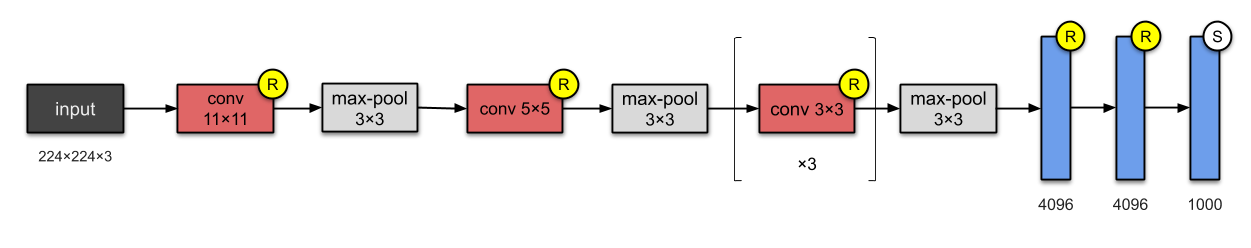

**Impact**

They were the first to implement Rectified Linear Units (ReLUs) as activation functions.

[Official Paper](https://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks)

In [5]:
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def get_model():
  model = tf.keras.Sequential([
    layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(224,224,3)),
    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    layers.BatchNormalization(),
    layers.Conv2D(filters=384, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    layers.BatchNormalization(),
    layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    layers.Flatten(),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
                               
  ])

  return model


In [ ]:
model = get_model()

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 54, 54, 96)        34944     
_________________________________________________________________
batch_normalization (BatchNo (None, 54, 54, 96)        384       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 26, 26, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 256)       614656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 256)       1024      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 384)       8

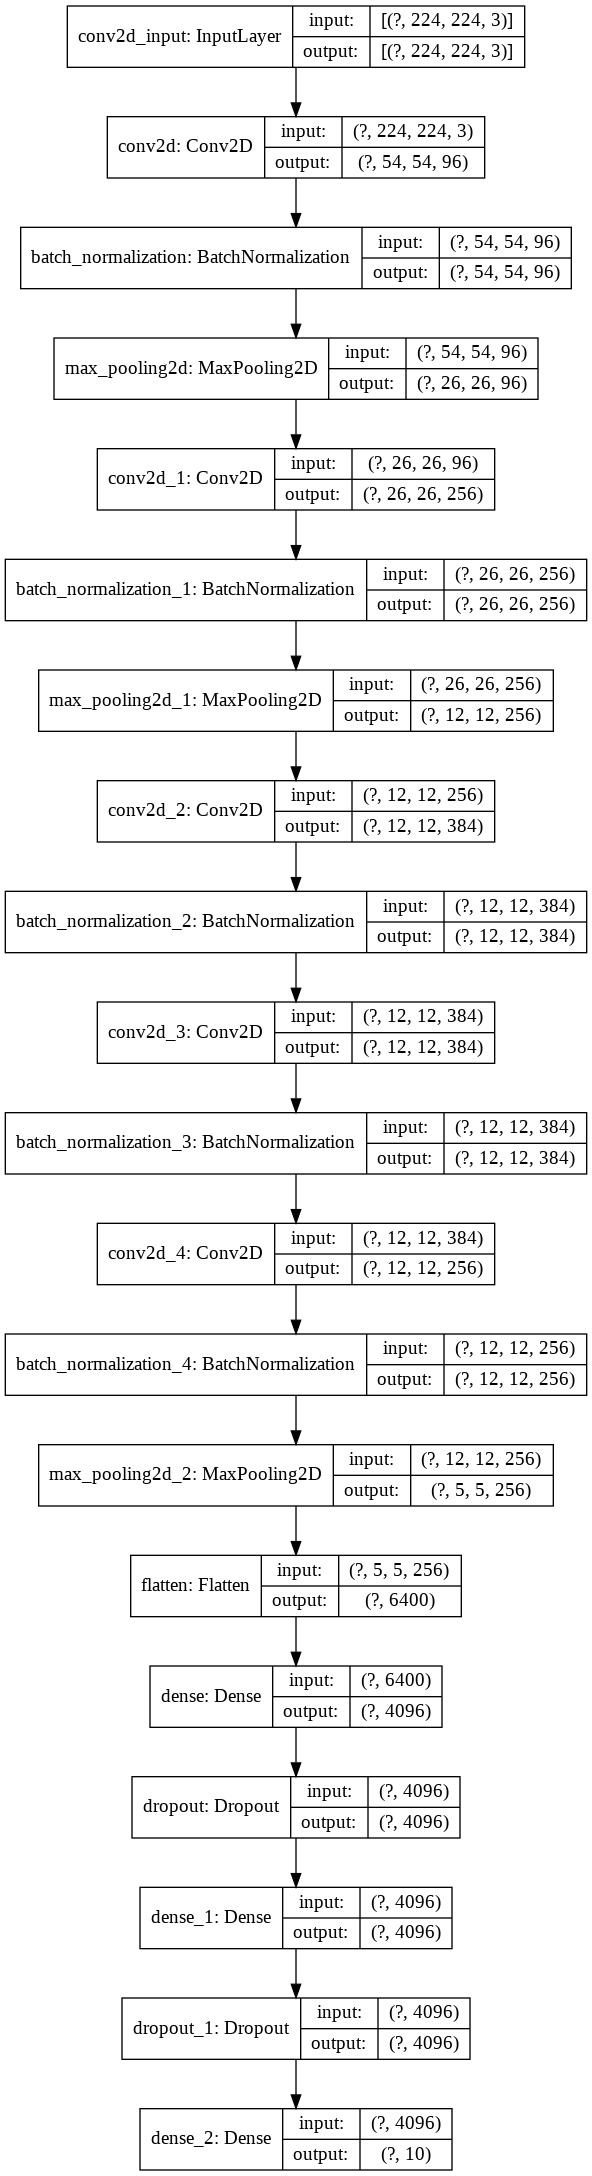

In [ ]:
tf.keras.utils.plot_model(model, 'alex.png', show_shapes=True)

In [11]:
from tensorflow.keras.datasets import cifar10

In [12]:
(train_x, train_y), (test_x, test_y) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
enc = OneHotEncoder()
enc.fit(train_y)

train_y = enc.transform(train_y).toarray()

test_y = enc.transform(test_y).toarray()

In [21]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

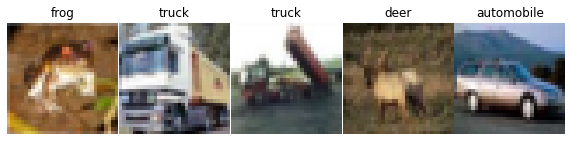

In [ ]:
plt.figure(figsize=(10,10))

for n in range(5):
    ax = plt.subplot(1,5, n+1)
    plt.imshow(train_x[n,:,:,:])
    plt.axis('off')
    index = np.where(train_y[n,:] == 1)
    plt.title(labels[np.squeeze(index)])
plt.subplots_adjust(wspace=0.01, hspace=0.001)

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_x, train_y))

test_dataset = tf.data.Dataset.from_tensor_slices((test_x, test_y))

In [ ]:
def pre_procession(dataset):

  def map_fn(image, label):
    image = tf.image.resize_with_pad(
    image, 224, 224,)

    image = image/255.

    return image, label

  dataset = dataset.map(map_fn)

  return dataset

In [ ]:
train_dataset = pre_procession(train_dataset)

test_dataset = pre_procession(test_dataset)

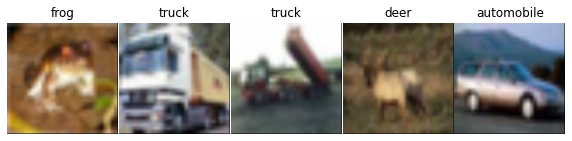

In [ ]:
plt.figure(figsize=(10,10))
elem = train_dataset.take(5)
for ele,n in zip(elem,range(5)):
  ax = plt.subplot(1,5,n+1)
  plt.imshow(ele[0])
  plt.axis('off')
  index = np.where(ele[1] == 1)
  plt.title(labels[np.squeeze(index)])
plt.subplots_adjust(wspace=0.01, hspace=0.001)


In [ ]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [2]:
%cd drive/My Drive/Models/AlexNet

/content/drive/My Drive/Models/AlexNet


In [ ]:
!ls

alex.png  checkpoint


In [ ]:
train_size =  train_dataset.cardinality().numpy()

test_size = test_dataset.cardinality().numpy()

In [ ]:


train_dataset = (train_dataset
                  .shuffle(buffer_size=1000)
                  .batch(batch_size=16, drop_remainder=True))

test_dataset = (test_dataset
                  .shuffle(buffer_size=1000)
                  .batch(batch_size=8, drop_remainder=True))

In [ ]:
batch_train = train_dataset.cardinality().numpy()

batch_test = test_dataset.cardinality().numpy()

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy', patience=10, verbose=2,
)

save_model = tf.keras.callbacks.ModelCheckpoint(
    'checkpoint/', monitor='val_accuracy', verbose=2, save_best_only=True,
)

In [ ]:
model.fit(train_dataset, validation_data=test_dataset, epochs=100,callbacks = [early_stopping, save_model] )

Epoch 1/100
3125/3125 [==============================] - ETA: 0s - loss: 2.2016 - accuracy: 0.3113
Epoch 00001: val_accuracy improved from -inf to 0.30190, saving model to checkpoint/
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: checkpoint/assets
3125/3125 [==============================] - 269s 86ms/step - loss: 2.2016 - accuracy: 0.3113 - val_loss: 1.9802 - val_accuracy: 0.3019
Epoch 2/100
3125/3125 [==============================] - ETA: 0s - loss: 1.5098 - accuracy: 0.4636
Epoch 00002: val_accuracy improved from 0.30190 to 0.50180, saving model to checkpoint/
INFO:tensorflow:Assets written to: checkpoint/assets
3125/3125 [==============================] - 276s 88ms/step - loss: 1.5098 - accuracy: 0.4636 - val_loss: 1.4063 - val_accuracy: 0.5018
Epoch 3/100
3125/

In [6]:
model = tf.keras.models.load_model('checkpoint')

In [7]:
def pre_process_predict(i1, i2):
  img = test_x[i1:i2,:,:,:]

  img = tf.data.Dataset.from_tensors(img)

  def map_fn1(image):
    image = tf.image.resize_with_pad(
    image, 224, 224,)

    image = image/255.

    return image

  img = img.map(map_fn1)
  

  return img



In [8]:
def decode(predict):
  index = np.argmax(predict)
  
  return labels[index]

In [17]:
img = pre_process_predict(17,18)

(-0.5, 223.5, 223.5, -0.5)

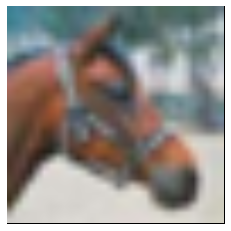

In [19]:
plt.imshow(next(iter(img))[0,:,:,:])
plt.axis('off')

In [22]:
decode(model.predict(img))

'horse'

In [23]:
layers = model.layers
inputs = model.inputs

In [24]:
outputs = [layer.output for layer in layers]

visualizer_model = tf.keras.Model(inputs = inputs, outputs=outputs)

In [25]:
feature_extractor = visualizer_model.predict(img)

In [26]:


# l1 = feature_extractor[0]
# print(f'\n{l1.shape}')

# imgs = l1[0,:,:,:]
# plt.figure(figsize=(30,30))

# for n in range(96):
#   ax = plt.subplot(12, 8, n+1)
#   plt.imshow(imgs[:,:,n])
#   plt.axis('off')
#   plt.title(f'Filter-{n+1}')
# plt.subplots_adjust(wspace=0.001, hspace=0.5)
def img_generator(layer, size, batch):
  l = feature_extractor[layer]
  print(f'\n{l.shape}')

  imgs = l[0,:,:,:]
  for n in range(size//batch):
    yield imgs[:,:,n*batch:(n+1)*batch], [x for x in range(n*batch,(n+1)*batch)]
  yield imgs[:,:,(size//batch)*batch:], [x for x in range(size//batch*batch,size)]

In [27]:
img_gen1 = img_generator(0, 96, 5)

Layer-1

(1, 54, 54, 96)


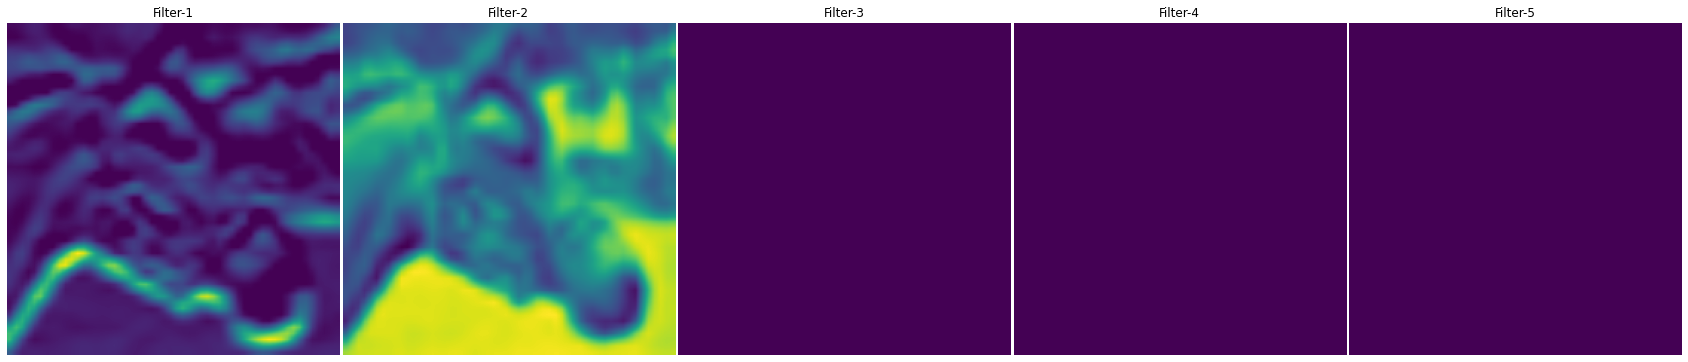

In [28]:
# layer 1(Conv2D layer)
# o/p=(?,54,54,96)

print('Layer-1')
try:
  img,n = next(img_gen1)
  plt.figure(figsize=(30,30))
  res_img = tf.image.resize_with_pad(
      img, 224, 224,)
  for i in range(len(n)):
    ax = plt.subplot(1, 5, i+1)
    plt.imshow(res_img[:,:,i])
    plt.axis('off')
    plt.title(f'Filter-{n[i]+1}')
  plt.subplots_adjust(wspace=0.01, hspace=0.5)
except:
  print('End reached')

In [32]:
img_gen2 = img_generator(6, 384, 5)

Layer-7


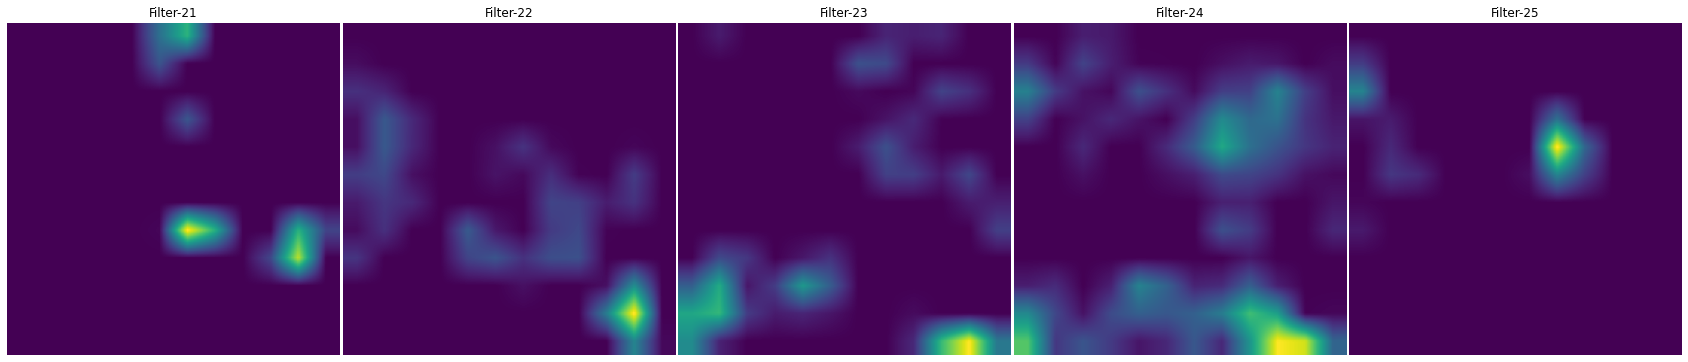

In [37]:
# layer 7(Conv2D)
# o/p=(?,12,12,384)

print('Layer-7')
try:
  img,n = next(img_gen2)
  plt.figure(figsize=(30,30))
  res_img = tf.image.resize_with_pad(
      img, 224, 224,)
  for i in range(len(n)):
    ax = plt.subplot(1, 5, i+1)
    plt.imshow(res_img[:,:,i])
    plt.axis('off')
    plt.title(f'Filter-{n[i]+1}')
  plt.subplots_adjust(wspace=0.01, hspace=0.5)
except:
  print('End reached')


In [38]:
img_gen3 = img_generator(3, 256, 5)

Layer-4

(1, 26, 26, 256)


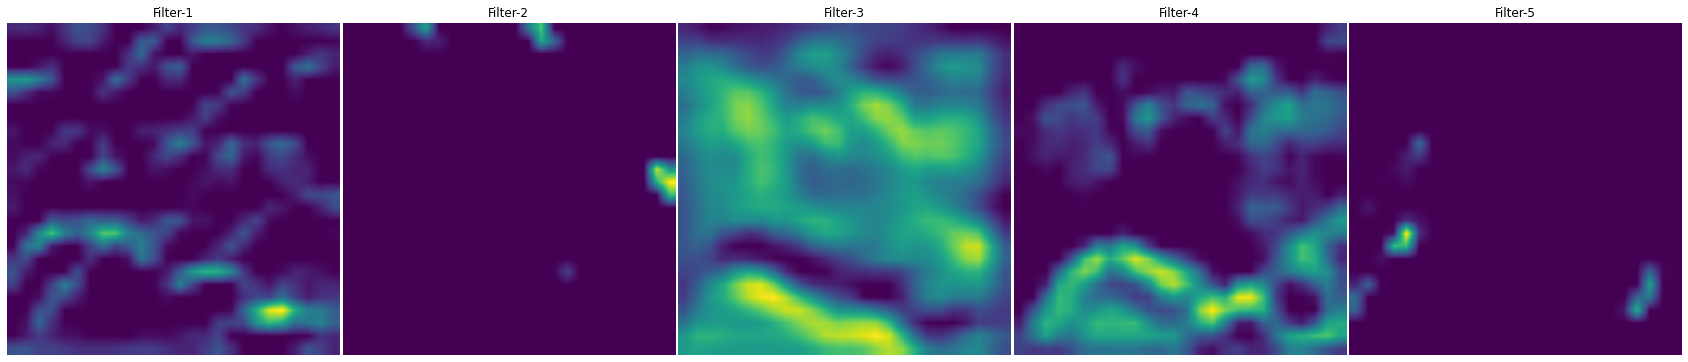

In [39]:
# layer 4(Conv2D layer)
# o/p=(?,26,26,256)

print('Layer-4')
try:
  img,n = next(img_gen3)
  plt.figure(figsize=(30,30))
  res_img = tf.image.resize_with_pad(
      img, 224, 224,)
  for i in range(len(n)):
    ax = plt.subplot(1, 5, i+1)
    plt.imshow(res_img[:,:,i])
    plt.axis('off')
    plt.title(f'Filter-{n[i]+1}')
  plt.subplots_adjust(wspace=0.01, hspace=0.5)
except:
  print('End reached')


In [40]:
img_gen4 = img_generator(10, 256, 5)

Layer-11

(1, 12, 12, 256)


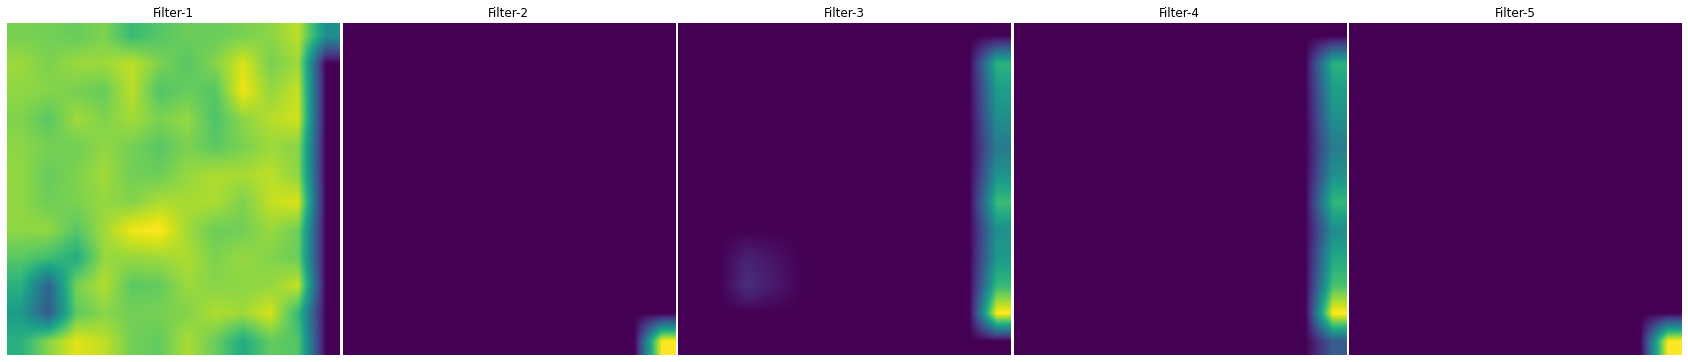

In [41]:
# layer 11(Conv2D layer)
# o/p=(?,12,12,256)

print('Layer-11')
try:
  img,n = next(img_gen4)
  plt.figure(figsize=(30,30))
  res_img = tf.image.resize_with_pad(
      img, 224, 224,)
  for i in range(len(n)):
    ax = plt.subplot(1, 5, i+1)
    plt.imshow(res_img[:,:,i])
    plt.axis('off')
    plt.title(f'Filter-{n[i]+1}')
  plt.subplots_adjust(wspace=0.01, hspace=0.5)
except:
  print('End reached')